###### Video Processing Lab
* extract frames from video
* apply morphologuical or any filtering techniques (can use built in functions)
* make into video again 

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# define the video path
# file = 'bus_cif.y4m'

# # capture the video
# cap = cv2.VideoCapture(file)
# i = 0  # frame index to save frames

# # extract and save the video frames
# while cap.isOpened():
#     ret, frame = cap.read()
#     if ret:
#         cv2.imwrite('./frames/test_frame_'+str(i)+'.png', frame)
#         i+=1

In [3]:
from moviepy.editor import *

clip = VideoFileClip("bus_cif.y4m")
clip = clip.subclip(0, 5)
clip.ipython_display()

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [4]:
vidcap = cv2.VideoCapture('bus_cif.y4m')
success,image = vidcap.read()
count = 0
images = []
frame = 0 #after first frame read, so frame 0 will be saved, next every 10th
success = True
while success:

   if frame % 8 == 0:
       images.append(image)     # save frame as JPEG file
       count += 1
   success,image = vidcap.read()
   frame += 1

In [5]:
len(images)

19

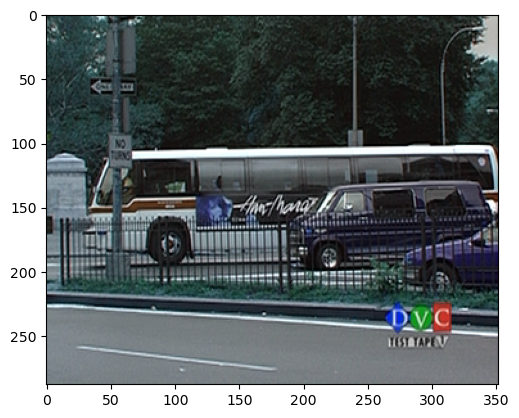

In [6]:
# plt.subplots(nrows=10,ncols=3)
img = images[18]
plt.imshow(img)
plt.show()

In [7]:
img.shape

(288, 352, 3)

In [8]:
img = img[:,:,0]
img.shape

(288, 352)

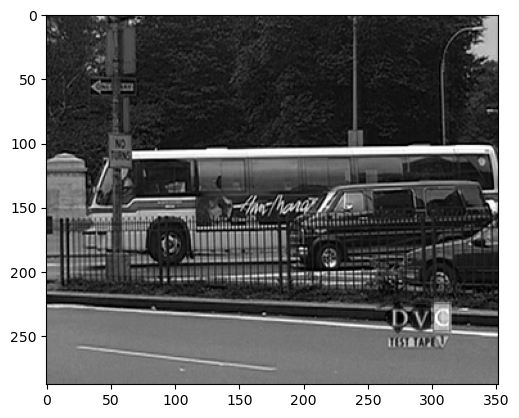

In [9]:
plt.imshow(img,cmap = 'gray')
plt.show()

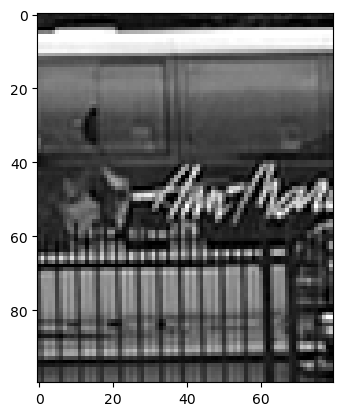

In [10]:
plt.imshow(img[100:200,120:200],cmap = 'gray')
plt.show()

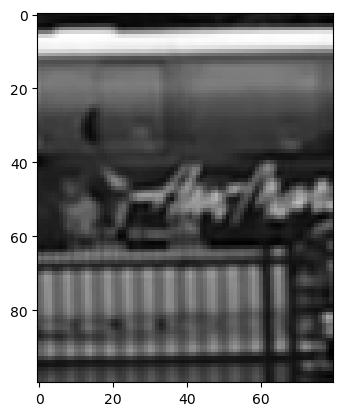

In [30]:
blur_img = cv2.GaussianBlur(img, (3, 3), cv2.BORDER_DEFAULT)
plt.imshow(blur_img[100:200,120:200],cmap = 'gray')
plt.show()

In [41]:
# kernel = np.ones((3,3),dtype=np.uint8)
# img_erode = cv2.erode(img, kernel, iterations=1)
# img_dilate = cv2.dilate(img_erode, kernel, iterations=1)
# plt.imshow(img_dilate,cmap='gray')
# plt.show()

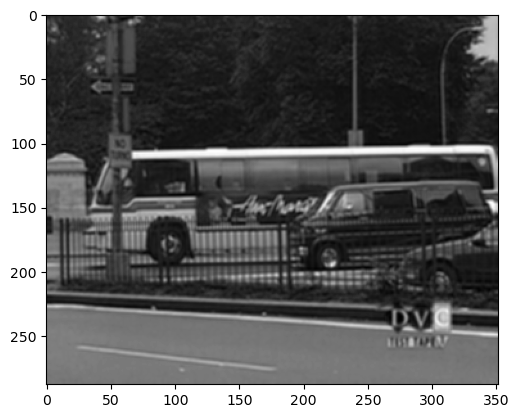

In [46]:
edges = cv2.Canny(blur_img,50,50)
plt.imshow(blur_img,cmap = 'gray')
plt.show()

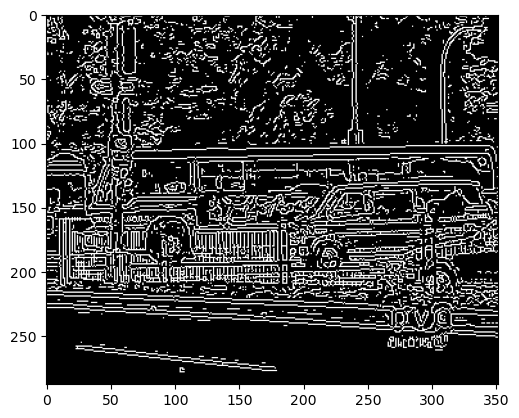

In [47]:
plt.imshow(edges,cmap = 'gray')
plt.show()

In [61]:
images.append(edges)

Tryinh to identify text in image

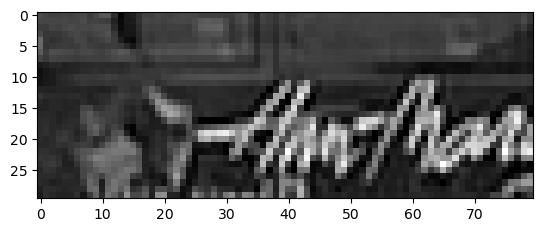

In [80]:
part_img = img[130:160,120:200]
plt.imshow(part_img,cmap='gray')
plt.show()

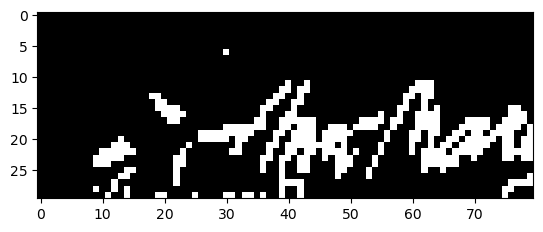

In [81]:
threshold = 106 #thresholding limit
max_intensity= np.max(part_img)
thres_img = np.where(part_img>threshold,max_intensity,0)
plt.imshow(thres_img, cmap="gray");
plt.show()

In [87]:
thres_img.shape

(30, 80)

In [105]:
def noise_reduction(img,kernel_size):
    kernel = kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(kernel_size,kernel_size))
#     img_erode1 = cv2.erode(img, kernel, iterations=1)
#     img_dilate1 = cv2.dilate(img_erode1, kernel, iterations=2)
#     img_dilate2 = cv2.dilate(img_dilate1, kernel, iterations=1)
#     img_erode2 = cv2.erode(img_dilate2, kernel, iterations=1)
    image = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    return image

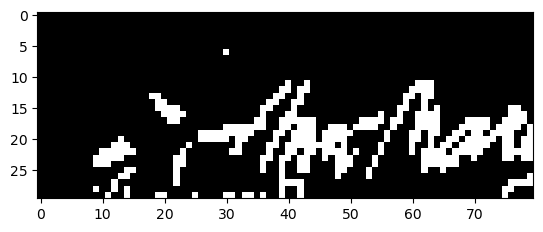

In [123]:
thres_img = thres_img.astype('uint8')
img_for_text = cv2.blur(thres_img,(1,1))
text_img = noise_reduction(img_for_text,1)
plt.imshow(text_img, cmap="gray");
plt.show()

In [124]:
images.append(img_for_text)

In [140]:
# # size = 720*16//9, 720
# duration = len(images) -1 
# fps = 1
# out = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (size[1], size[0]), False)
# for i in range(fps * duration):
#     data = images[i]
#     out.write(data)
# out.release()

In [150]:
# import av
# output_filename = 'output.mp4'
# output_container = av.open(output_filename, mode='w')

# # Set up the video stream properties
# width, height = 512, 512
# fps = 1


In [151]:

# output_stream = output_container.add_stream('mpeg4', rate=fps)
# output_stream.width = width
# output_stream.height = height


# # Define the image arrays to use
# num_frames = len(images) 

# # Loop through the image arrays and add them to the output stream
# for image_array in images:
#     # Convert the image array to a video frame
#     output_frame = av.VideoFrame.from_ndarray(image_array)

#     # Encode the video frame and write it to the output container
#     packet = output_stream.encode(output_frame)
#     output_container.mux(packet)

# # Finalize the output video file
# output_container.close()

# # Print some debug information
# print(f'Output file saved to {output_filename}')
# print(f'Number of frames in output file: {output_stream.frames}')
# print(f'Output stream time base: {output_stream.time_base}')

In [161]:
import moviepy
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(images[:-2], fps=fps)
clip.write_videofile('my_video.mp4')

Moviepy - Building video my_video.mp4.
Moviepy - Writing video my_video.mp4



Moviepy - Done !
Moviepy - video ready my_video.mp4


In [162]:
clip.ipython_display()

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4
